In [1]:
#
# Julia version of code adapted from
# https://github.com/rawlings-group/paresto/blob/master/examples/green_book/bvsm.m
#

In [37]:
using CSV, DataFrames
using DifferentialEquations, DiffEqSensitivity
using Plots
using Optim
using FiniteDiff, ForwardDiff, FiniteDifferences
using Interpolations
using Distributions
using LinearAlgebra

In [28]:
Qf_data = CSV.read("data_sets/flow.dat", DataFrame, header = ["Col"])

,Col
,String
1,9.000000 9.7817838E-02 4.786000
2,19.00000 1.290601 14.21800
3,29.00000 1.262779 13.99800
4,39.00000 1.240016 13.81800
5,49.00000 1.215736 13.62600
6,59.00000 1.187156 13.40000
7,69.00000 1.160599 13.19000
8,79.00000 0.5545961 8.398001
9,89.00000 1.109508 12.78600


In [4]:
strsplit(x) = [parse(Float64, y) for y in split(strip(x),r"\s+")]

strsplit (generic function with 1 method)

In [5]:
Qf_data_v = strsplit.(Qf_data.Col)

87-element Vector{Vector{Float64}}:
 [9.0, 0.097817838, 4.786]
 [19.0, 1.290601, 14.218]
 [29.0, 1.262779, 13.998]
 [39.0, 1.240016, 13.818]
 [49.0, 1.215736, 13.626]
 [59.0, 1.187156, 13.4]
 [69.0, 1.160599, 13.19]
 [79.0, 0.5545961, 8.398001]
 [89.0, 1.109508, 12.786]
 [99.0, 1.361925, 14.782]
 [109.0, 1.332333, 14.548]
 [119.0, 1.294648, 14.25]
 [129.0, 1.271885, 14.07]
 ⋮
 [759.0, 0.1059619, 4.8504]
 [769.0, 0.00067019463, 4.0178]
 [779.0, 0.068099439, 4.551]
 [789.0, 0.000872612, 4.0194]
 [799.0, 0.00097372534, 4.0202]
 [809.0, 0.00087256433, 4.0194]
 [819.0, 0.00079669955, 4.0188]
 [829.0, 0.00072083471, 4.0182]
 [839.0, 0.00056912901, 4.017]
 [849.0, 0.00046801567, 4.0162]
 [859.0, 0.00051856041, 4.0166]
 [869.0, 0.00044267176, 4.016]

In [6]:
tQf = append!([0.0], [x[1] for x in Qf_data_v])
Qf = append!([0.0], [x[2] for x in Qf_data_v]./0.728)

88-element Vector{Float64}:
 0.0
 0.1343651620879121
 1.7728035714285717
 1.7345865384615387
 1.7033186813186814
 1.6699670329670329
 1.6307087912087914
 1.5942293956043956
 0.7618078296703298
 1.5240494505494504
 1.870776098901099
 1.8301277472527473
 1.7783626373626373
 ⋮
 0.14555206043956043
 0.0009205970192307693
 0.09354318543956044
 0.0011986428571428573
 0.0013375348076923078
 0.0011985773763736264
 0.0010943675137362638
 0.0009901575686813188
 0.0007817706181318682
 0.0006428786675824176
 0.0007123082554945056
 0.0006080656043956044

In [7]:
Qf_itl = ConstantInterpolation(tQf, Qf)

88-element extrapolate(interpolate((::Vector{Float64},), ::Vector{Float64}, Gridded(Constant{Nearest}())), Throw()) with element type Float64:
 0.0
 0.1343651620879121
 1.7728035714285717
 1.7345865384615387
 1.7033186813186814
 1.6699670329670329
 1.6307087912087914
 1.5942293956043956
 0.7618078296703298
 1.5240494505494504
 1.870776098901099
 1.8301277472527473
 1.7783626373626373
 ⋮
 0.14555206043956043
 0.0009205970192307693
 0.09354318543956044
 0.0011986428571428573
 0.0013375348076923078
 0.0011985773763736264
 0.0010943675137362638
 0.0009901575686813188
 0.0007817706181318682
 0.0006428786675824176
 0.0007123082554945056
 0.0006080656043956044

In [8]:
tQf_i = 0:1:maximum(tQf)
Qf_i = Qf_itl.(tQf_i)

870-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 ⋮
 0.0007123082554945056
 0.0007123082554945056
 0.0007123082554945056
 0.0007123082554945056
 0.0007123082554945056
 0.0007123082554945056
 0.0006080656043956044
 0.0006080656043956044
 0.0006080656043956044
 0.0006080656043956044
 0.0006080656043956044
 0.0006080656043956044

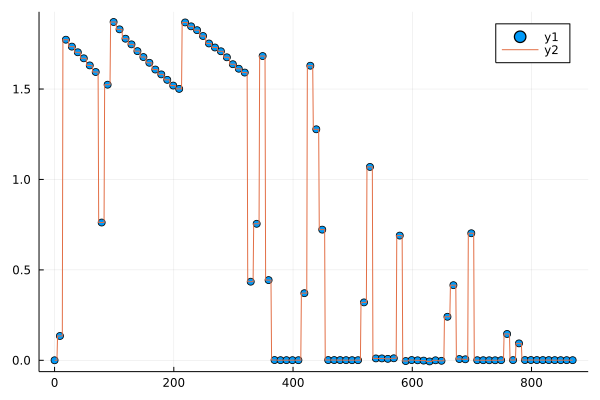

In [9]:
plot(tQf, Qf, seriestype = :scatter)
plot!(tQf_i, Qf_i)

In [10]:
lc_data = CSV.read("data_sets/lc.dat", DataFrame, delim = "\t", header = ["Col"])

,Col
,String31
1,414 0.17050
2,424 0.16040
3,434 0.13250
4,444 0.10840
5,493 0.10140
6,503 0.10420
7,513 0.10450
8,523 0.09700
9,533 0.08240


In [11]:
lc_data_v = strsplit.(lc_data.Col)
tlc = [x[1] for x in lc_data_v]
lc = [x[2] for x in lc_data_v]

35-element Vector{Float64}:
 0.1705
 0.1604
 0.1325
 0.1084
 0.1014
 0.1042
 0.1045
 0.097
 0.0824
 0.0678
 0.0697
 0.0702
 0.0692
 ⋮
 0.0449
 0.0456
 0.045
 0.0434
 0.0428
 0.0426
 0.0409
 0.0399
 0.0397
 0.0394
 0.0374
 0.0371

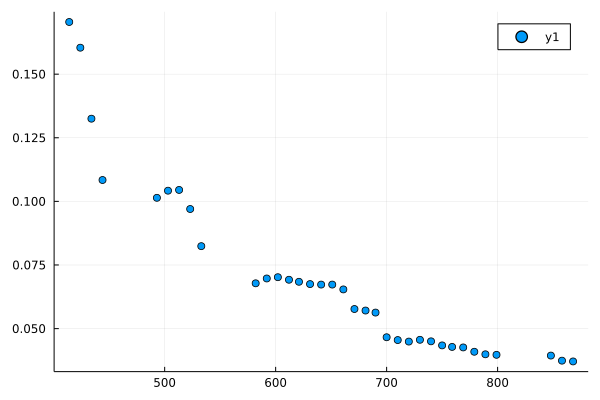

In [12]:
plot(tlc, lc, seriestype = :scatter)

In [13]:
function rates_red(u, p, t)
    
    cBf = 0.00721
    vR0 = 2370.0

    vR = u[1]
    eps2 = u[2]
    
    nBadded = max((vR - vR0) * cBf, 1.0e-6)
    
    Qf_itl = p[1]
    nA0 = p[2]
    k = p[3]
    
    dvR = Qf_itl(t)
    deps2 = Qf_itl(t) * cBf / (1.0 + k * (nA0 - nBadded + eps2)/(nBadded - 2.0 * eps2))
    
    return [dvR, deps2]

end

rates_red (generic function with 1 method)

In [14]:
u0 = [2370.0, 0.0]
p = [Qf_itl, 2.35, 2.0]
tspan = (0.0, 850.0)
prob = ODEProblem(rates_red, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
timespan: (0.0, 850.0)
u0: 2-element Vector{Float64}:
 2370.0
    0.0

In [18]:
sol = solve(prob, Rosenbrock23(), tstops = tQf);

In [16]:
function get_lcpred(t, sol)
    cBf = 0.00721
    vR0 = 2370.0
    nBadded = (sol(t)[1] - vR0) * cBf
    nD = sol(t)[2]
    nC = nBadded - 2.0 * nD
    lcpred = 1.0/(1.0 + 2*nD/(nC + 1.0e-6))
    return lcpred
end

get_lcpred (generic function with 1 method)

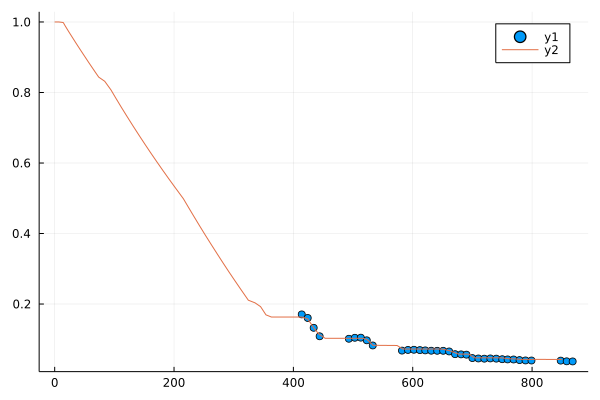

In [19]:
plot(tlc, lc, seriestype = :scatter)
plot!(sol.t, [get_lcpred(t, sol) for t in sol.t])

In [20]:
lc_data = DataFrame(tlc = tlc, lc = lc)

,tlc,lc
,Float64,Float64
1,414.0,0.1705
2,424.0,0.1604
3,434.0,0.1325
4,444.0,0.1084
5,493.0,0.1014
6,503.0,0.1042
7,513.0,0.1045
8,523.0,0.097
9,533.0,0.0824


In [21]:
function calc_SSE(pest, data, Qf_itl, tQf)

    _prob = remake(prob, p = [Qf_itl, pest[1], pest[2]])
    sol = solve(_prob, Rosenbrock23(), tstops = tQf)
    ypred = [get_lcpred(t, sol) for t in data.tlc]
    sse = 0.0
    for (i, t) in enumerate(data.tlc)
        sse = sse + (data.lc[i]/ypred[i] - 1.0)^2
    end
    return sse
end

calc_SSE (generic function with 1 method)

In [22]:
calc_SSE([2.35, 2.0], lc_data, Qf_itl, tQf)

0.12009397329503754

In [ ]:
res_pe = optimize(p -> calc_SSE(p, lc_data, Qf_itl, tQf), [2.35, 1.0], LBFGS())

In [ ]:
res_pe.minimizer

In [ ]:
H_ad = ForwardDiff.hessian(p -> calc_SSE(p, lc_data, Qf_itl), [2000.0, 1000.0])

In [ ]:
calc_SSE_a(p) = calc_SSE(p, lc_data, Qf_itl)

In [23]:
H = FiniteDiff.finite_difference_hessian(p -> calc_SSE(p, lc_data, Qf_itl, tQf), [2.35, 2.0])

2×2 LinearAlgebra.Symmetric{Float64, Matrix{Float64}}:
 2546.9     -42.6797
  -42.6797    8.28996

In [24]:
inv(H)

2×2 LinearAlgebra.Symmetric{Float64, Matrix{Float64}}:
 0.000429707  0.00221228
 0.00221228   0.132017

In [25]:
n = size(lc_data)[1]
p = 2
mse = calc_SSE([2.35, 2.0], lc_data, Qf_itl, tQf)/(n - p)

0.0036392113119708344

In [26]:
cov_est = 2 * mse * inv(H)

2×2 LinearAlgebra.Symmetric{Float64, Matrix{Float64}}:
 3.12759e-6  1.61019e-5
 1.61019e-5  0.000960878

In [31]:
d = FDist(p, n-p)

FDist{Float64}(ν1=2.0, ν2=33.0)

In [33]:
mult_fact = p*quantile(d, 0.95)

6.569835302076573

In [41]:
sqrt.(mult_fact * diag(cov_est))

2-element Vector{Float64}:
 0.004532962016897855
 0.07945320788901994

In [44]:
n

35